## GReaT Example with California Housing Dataset

In [1]:
# Execute only once!
import os
import sys
sys.path.append("..")
os.chdir("..")

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import logging
from sklearn import datasets

In [4]:
from utils import set_logging_level
from be_great import GReaT

In [5]:
import matplotlib.pyplot as plt

In [6]:
logger = set_logging_level(logging.INFO)

### Load Data

In [7]:
data = datasets.fetch_california_housing(as_frame=True).frame
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Create GReaT Model

Only one epoch here for demonstration

In [8]:
great = GReaT("distilgpt2",                         # Name of the large language model used (see HuggingFace for more options)
              epochs=1,                             # Number of epochs to train (only one epoch for demonstration)
              save_steps=2000,                      # Save model weights every x steps
              logging_steps=50,                     # Log the loss and learning rate every x steps
              experiment_dir="trainer_california",  # Name of the directory where all intermediate steps are saved
              #lr_scheduler_type="constant",        # Specify the learning rate scheduler 
              #learning_rate=5e-5                   # Set the inital learning rate
             )

### Start Training

In [9]:
trainer = great.fit(data)

2022-10-13 10:12:58,445 - INFO - Convert data into HuggingFace dataset object... (great.py:99)
2022-10-13 10:12:58,451 - INFO - Create GReaT Trainer... (great.py:104)
2022-10-13 10:13:00,554 - INFO - Start training... (great.py:113)
/home/kathrin/miniconda3/envs/transformers/lib/python3.9/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 20640
  Num Epochs = 1
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 1290
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a c

Step,Training Loss
50,2.680700
100,2.031900
150,1.939400
200,1.914700
250,1.875900
300,1.867900
350,1.851000
400,1.836000
450,1.800000
500,1.803000




Training completed. Do not forget to share your model on huggingface.co/models =)




In [10]:
loss_hist = trainer.state.log_history.copy()
loss_hist.pop()

{'train_runtime': 111.2294,
 'train_samples_per_second': 185.562,
 'train_steps_per_second': 11.598,
 'total_flos': 464022201434112.0,
 'train_loss': 1.854305208191391,
 'epoch': 1.0,
 'step': 1290}

In [11]:
loss = [x["loss"] for x in loss_hist]
epochs = [x["epoch"] for x in loss_hist]

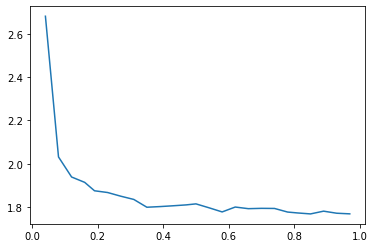

In [12]:
plt.plot(epochs, loss)

### Save Model

In [ ]:
great.save("california")

### Load Model

In [ ]:
# great = GReaT.load_from_dir("california")

In [13]:
great.load_finetuned_model("../great_private/models/california/california_distilgpt2_100.pt")

### Generate Samples

In [14]:
n_samples = 1000

In [19]:
samples = great.sample(n_samples, k=50, device="cuda:1")

1035it [00:09, 107.38it/s]                                                                                              


In [20]:
samples.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,6.0990,34.0,6.242424,1.000000,1758.0,2.856757,33.68,-117.88,4.09088
1,4.1875,31.0,5.879051,1.041030,1127.0,2.446928,38.63,-121.35,1.53564
2,3.6000,16.0,6.837838,1.000000,693.0,2.790062,36.64,-120.84,1.10397
3,4.8934,23.0,5.137055,0.945205,984.0,3.160714,38.00,-121.45,1.64981
4,2.4861,52.0,4.694915,1.015965,867.0,2.251497,37.31,-122.46,1.09459


In [21]:
samples.shape

(1000, 9)

In [22]:
samples.to_csv("california_samples.csv")

## Plot Data

Original Data

In [26]:
true_samples = data.sample(n = 1000)

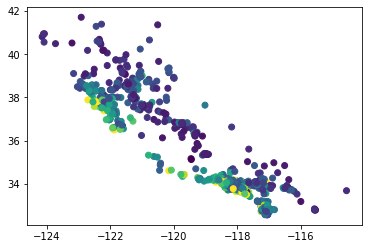

In [27]:
plt.scatter(true_samples["Longitude"], true_samples["Latitude"], c=true_samples["MedHouseVal"])

Generated samples

In [28]:
#samples = pd.read_csv("california_samples.csv")

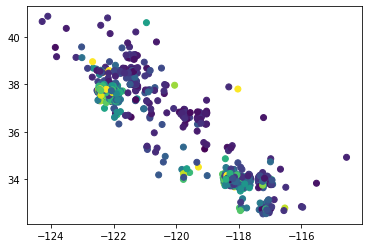

In [29]:
plt.scatter(samples["Longitude"], samples["Latitude"], c=samples["MedHouseVal"])